## References

https://matplotlib.org/3.1.1/gallery/lines_bars_and_markers/marker_reference.html

In [1]:
import sys
sys.path.append("../")
from triple_barrier.plots import PlotTripleBarrier
from triple_barrier.triple_barrier import TradeSide
from triple_barrier.triple_barrier import BarrierHit
from triple_barrier.triple_barrier import BarrierType

import pandas as pd
import mplfinance as mpl
from datetime import datetime

## Open Dataset

In [2]:
columns = ["date-time", "open", "high", "low", "close", "volume"]
df = pd.read_csv("../tests/data/EURUSD_5 Mins_Ask_2023.01.02_2024.02.02.csv", 
                 names=columns, 
                 parse_dates=True, 
                 index_col="date-time",
                 header=0)

## Calculate Features

In [3]:
df["mva-7"] = df["close"].rolling(7).mean()
df["mva-24"] = df["close"].rolling(24).mean()

In [4]:
PIP_POSITION = 4
PIP_FACTOR = 10**-PIP_POSITION

## Plot Data

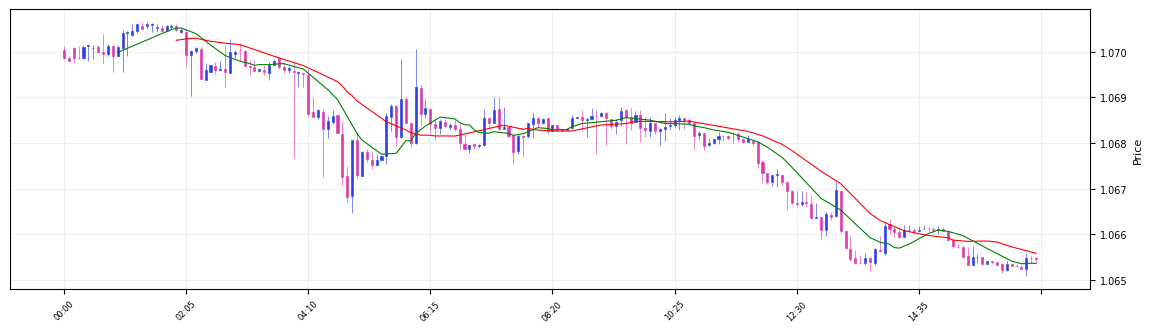

In [5]:
mpl.plot(df[0:200], type="candle", figsize=(15,4), mav=(12,24), style="ibd")

### Short Cases

Plotting barrier for 50


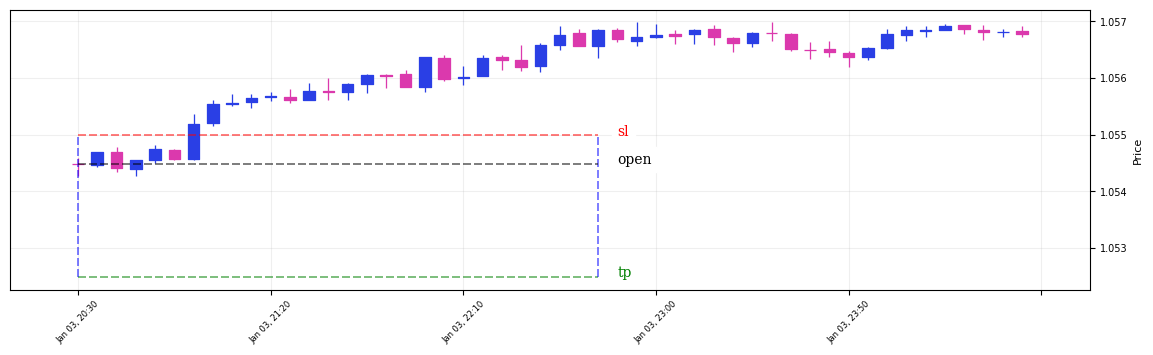

Open time  2023-01-03 20:30:00
Open price  1.05449
Stop loss 1.05499 (5) pips
Take profit 1.05249 (20) pips


In [6]:
open_period = "2023-01-03 20:30:00"
time_barrier = "2023-01-03 22:45:00"
trade_side = TradeSide.SELL
stop_loss_width = 5
take_profit_width = 20
open_price = df.loc[open_period]["open"]
stop_loss = round(open_price - trade_side.value * stop_loss_width*PIP_FACTOR, PIP_POSITION + 1)
take_profit = round(open_price + trade_side.value * take_profit_width*PIP_FACTOR, PIP_POSITION + 1)


plot_tb = PlotTripleBarrier(df.open, 
                           df.high,
                           df.low,
                           df.close,
                           PIP_POSITION)

plot_tb.plot(entry_period=open_period,
             stop_loss_level=stop_loss,
             take_profit_level=take_profit,
             time_barrier_datetime=time_barrier,
             )

print("Open time ", open_period)
print("Open price ", open_price)
print(f"Stop loss {stop_loss} ({stop_loss_width}) pips")
print(f"Take profit {take_profit} ({take_profit_width}) pips")

### Long Cases

Plotting barrier for 50


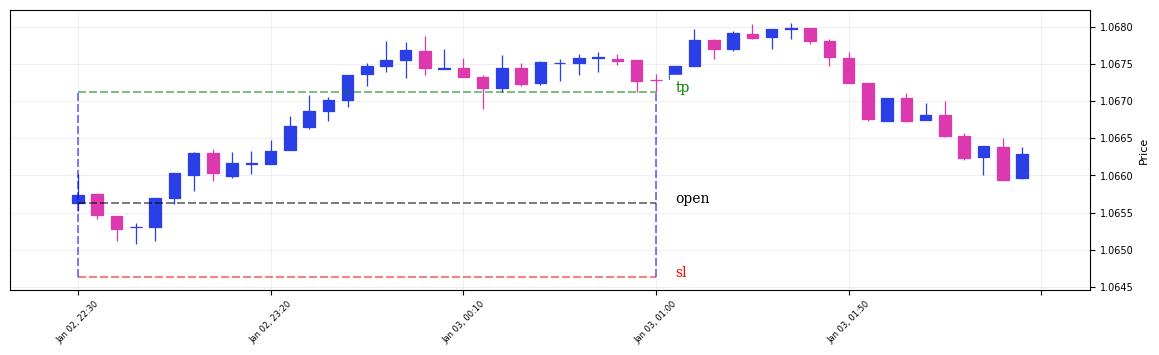

Open time  2023-01-02 22:30:00
Open price  1.06563
Stop loss 1.06463 (10) pips
Take profit 1.06713 (15) pips


In [7]:
open_period = "2023-01-02 22:30:00"
time_barrier = "2023-01-03 01:00:00"
open_price = df.open[open_period]
trade_side = TradeSide.BUY
stop_loss_width = 10
take_profit_width = 15
stop_loss = round(open_price - trade_side.value * stop_loss_width*PIP_FACTOR, PIP_POSITION + 1)
take_profit = round(open_price + trade_side.value * take_profit_width*PIP_FACTOR, PIP_POSITION + 1)


plot_tb = PlotTripleBarrier(df.open, 
                           df.high,
                           df.low,
                           df.close,
                           PIP_POSITION)


plot_tb.plot(entry_period=open_period,
             stop_loss_level=stop_loss,
             take_profit_level=take_profit,
             time_barrier_datetime=time_barrier,
             periods_to_plot=50
             )

print("Open time ", open_period)
print("Open price ", open_price)
print(f"Stop loss {stop_loss} ({stop_loss_width}) pips")
print(f"Take profit {take_profit} ({take_profit_width}) pips")

### Plot with moving averages

Plotting barrier for 50


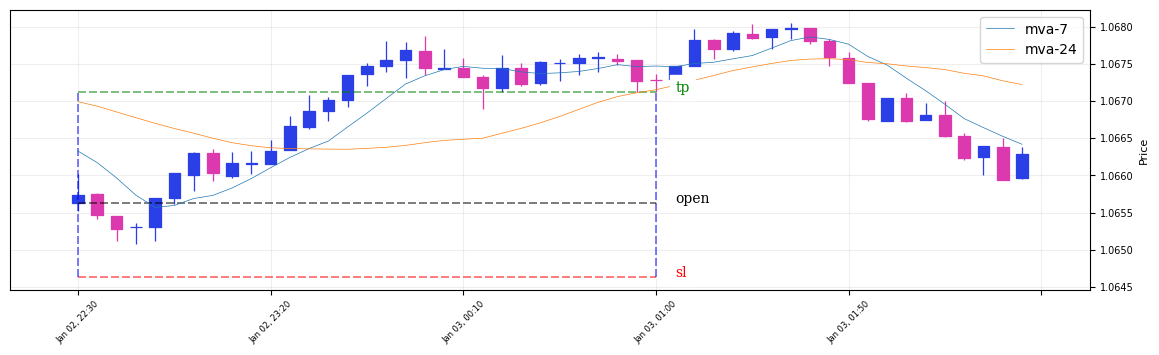

Open time  2023-01-02 22:30:00
Open price  1.06563
Stop loss 1.06463 (10) pips
Take profit 1.06713 (15) pips


In [8]:
open_period = "2023-01-02 22:30:00"
time_barrier = "2023-01-03 01:00:00"
open_price = df.open[open_period]
trade_side = TradeSide.BUY

stop_loss_width = 10
take_profit_width = 15

stop_loss = round(open_price - trade_side.value * stop_loss_width*PIP_FACTOR, PIP_POSITION + 1)
take_profit = round(open_price + trade_side.value * take_profit_width*PIP_FACTOR, PIP_POSITION + 1)


plot_tb = PlotTripleBarrier(df.open, 
                           df.high,
                           df.low,
                           df.close,
                           PIP_POSITION,
                           overlay_features=[ df["mva-7"], 
                                             df["mva-24"]])

plot_tb.plot(entry_period=open_period,
             stop_loss_level=stop_loss,
             take_profit_level=take_profit,
             time_barrier_datetime=time_barrier,
             periods_to_plot=50
             )

print("Open time ", open_period)
print("Open price ", open_price)
print(f"Stop loss {stop_loss} ({stop_loss_width}) pips")
print(f"Take profit {take_profit} ({take_profit_width}) pips")

### Plot dynamic barrier between stop loss and take profit, long

Plotting barrier for 40


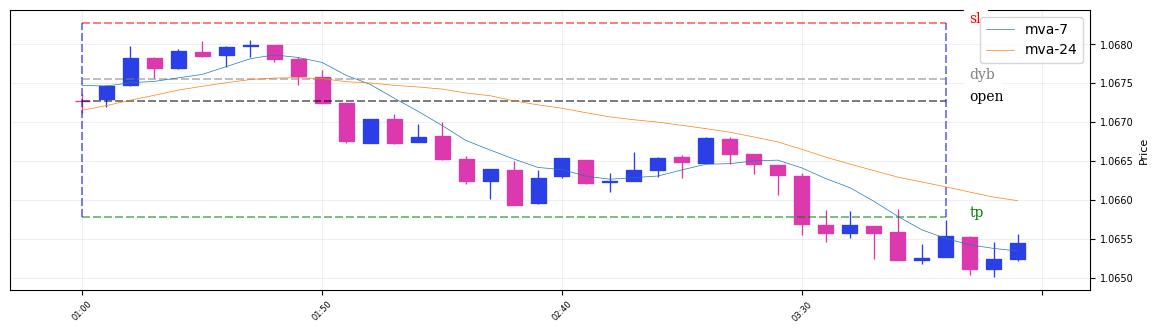

Open time  2023-01-03 01:00:00
Open price  1.06728
Stop loss 1.06828 (10) pips
Take profit 1.06578 (15) pips


In [9]:
open_period = "2023-01-03 01:00:00"
time_barrier = "2023-01-03 04:00:00"
open_price = df.open[open_period]
trade_side = TradeSide.SELL

stop_loss_width = 10
take_profit_width = 15

stop_loss = round(open_price - trade_side.value * stop_loss_width*PIP_FACTOR, PIP_POSITION + 1)
take_profit = round(open_price + trade_side.value * take_profit_width*PIP_FACTOR, PIP_POSITION + 1)

mask = (df["close"].shift(1) > df["mva-24"].shift(1) ) & ( df["close"] < df["mva-24"] )
dynamic_close = df.loc[mask][open_period: ].head(1)["mva-24"].values[0].round(PIP_POSITION+1)


plot_tb = PlotTripleBarrier(df.open, 
                           df.high,
                           df.low,
                           df.close,
                           PIP_POSITION,
                           overlay_features=[ df["mva-7"], 
                                             df["mva-24"]])

plot_tb.plot(entry_period=open_period,
             stop_loss_level=stop_loss,
             take_profit_level=take_profit,
             time_barrier_datetime=time_barrier,
             dynamic_exit_price=dynamic_close,
             periods_to_plot=40
             )

print("Open time ", open_period)
print("Open price ", open_price)
print(f"Stop loss {stop_loss} ({stop_loss_width}) pips")
print(f"Take profit {take_profit} ({take_profit_width}) pips")

### Plot dynamic barrier between stop loss and take profit, short

Plotting barrier for 50


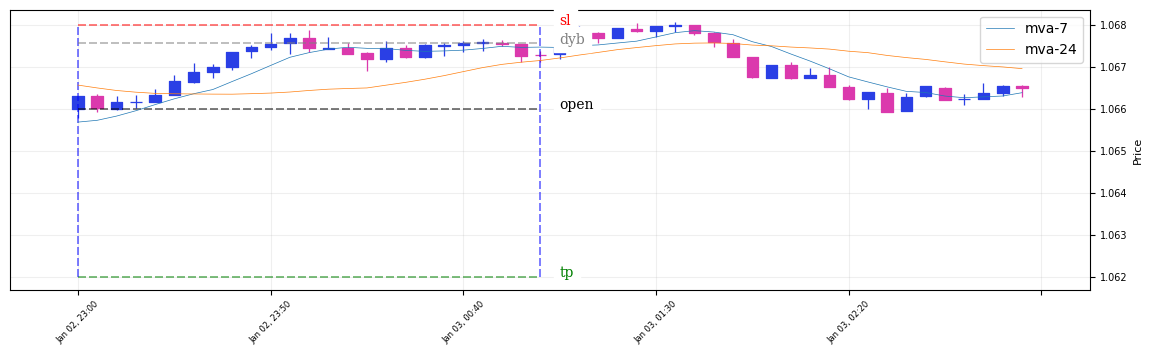

Open time  2023-01-02 23:00:00
Open price  1.066
Stop loss 1.068 (20) pips
Take profit 1.062 (40) pips
Dymamic close price 1.06756


In [15]:
open_period = "2023-01-02 23:00:00"
time_barrier = "2023-01-03 01:00:00"
open_price = df.open[open_period]
trade_side = TradeSide.SELL

stop_loss_width = 20
take_profit_width = 40
stop_loss = round(open_price - trade_side.value * stop_loss_width*PIP_FACTOR, PIP_POSITION + 1)
take_profit = round(open_price + trade_side.value * take_profit_width*PIP_FACTOR, PIP_POSITION + 1)

mask = (df["close"].shift(1) > df["mva-24"].shift(1) ) & ( df["close"] < df["mva-24"] )
dynamic_close = df.loc[mask][open_period: ].head(1)["mva-24"].values[0].round(PIP_POSITION+1)

plot_tb = PlotTripleBarrier(df.open, 
                           df.high,
                           df.low,
                           df.close,
                           PIP_POSITION,
                           overlay_features=[ df["mva-7"], 
                                             df["mva-24"]])

plot_tb.plot(entry_period=open_period,
             stop_loss_level=stop_loss,
             take_profit_level=take_profit,
             time_barrier_datetime=time_barrier,
             dynamic_exit_price=dynamic_close,
             periods_to_plot=50
             )

print("Open time ", open_period)
print("Open price ", open_price)
print(f"Stop loss {stop_loss} ({stop_loss_width}) pips")
print(f"Take profit {take_profit} ({take_profit_width}) pips")
print(f"Dymamic close price {dynamic_close}")

### Plot full triple barrier case: Dynamic barrier hit, between TP and SL, Long Trade

Plots the hit on a dynamic barrier located between stop loss and take profit for a long trade

This plots only the hit on the dynamic barrier, regardless that the first hit was on take profit

Plotting barrier for 50


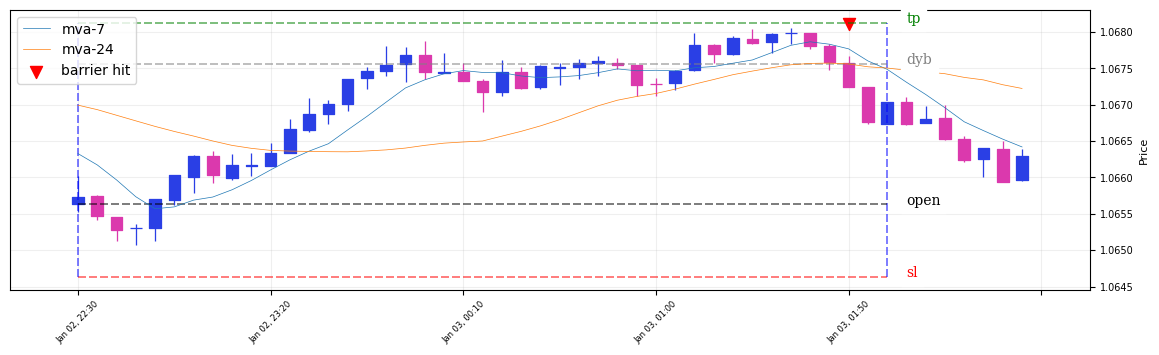

Open time  2023-01-02 22:30:00
Open price  1.06563
Stop loss 1.06463 (10) pips
Take profit 1.06813 (25) pips


In [11]:
# prepare data

open_period = "2023-01-02 22:30:00"
time_barrier = "2023-01-03 2:00:00"
open_price = df.open[open_period]
trade_side = TradeSide.BUY
stop_loss_width = 10
take_profit_width = 25
stop_loss = round(open_price - trade_side.value * stop_loss_width*PIP_FACTOR, PIP_POSITION + 1)
take_profit = round(open_price + trade_side.value * take_profit_width*PIP_FACTOR, PIP_POSITION + 1)

# calculate event attributes
mask = (df[open_period:]["close"].shift(1) > df[open_period:]["mva-24"].shift(1) ) & ( df[open_period:]["close"] < df[open_period:]["mva-24"] )
hit_level = df[open_period:][mask]["mva-24"].iloc[0].round(PIP_POSITION+1)
hit_datetime = df[open_period:][mask][open_period: ]["mva-24"].index[0]
barrier_hit = BarrierHit(level=hit_level, hit_datetime=hit_datetime, barrier_type=BarrierType.DYNAMIC)


# plot
plot_tb = PlotTripleBarrier(df.open, 
                           df.high,
                           df.low,
                           df.close,
                           4,
                           overlay_features=[ df["mva-7"], 
                                             df["mva-24"]])


plot_tb.plot(entry_period=open_period,
             stop_loss_level=stop_loss,
             take_profit_level=take_profit,
             time_barrier_datetime=time_barrier,
             dynamic_exit_price=hit_level,
             periods_to_plot=50,
             closing_event=barrier_hit
             )

print("Open time ", open_period)
print("Open price ", open_price)
print(f"Stop loss {stop_loss} ({stop_loss_width}) pips")
print(f"Take profit {take_profit} ({take_profit_width}) pips")

### Plot full triple barrier case: Dynamic barrier beyond TP and SL, Long Trade

Plots the hit on a dynamic barrier located between stop loss and take profit for a long trade

This plots only the hit on the dynamic barrier, regardless that the first hit was on take profit

Plotting barrier for 150


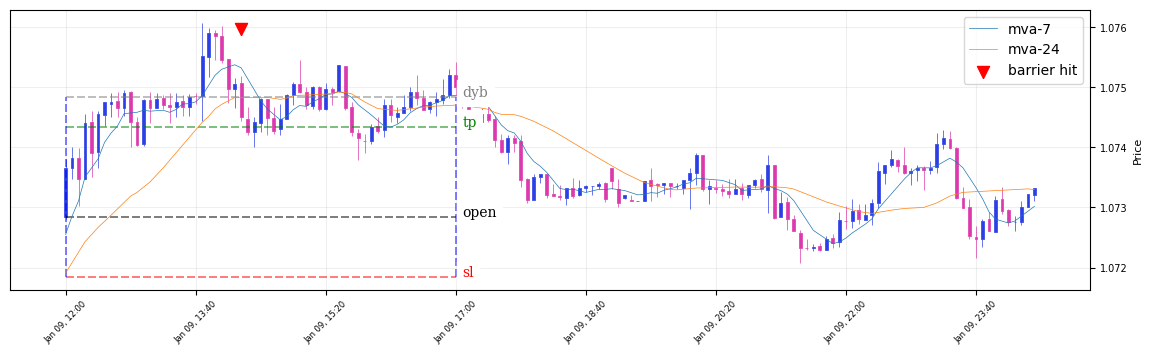

Open time  2023-01-09 12:00:00
Open price  1.07284
Stop loss 1.07184 (10) pips
Take profit 1.07434 (15) pips


In [12]:
# prepare data

open_period = "2023-01-09 12:00:00"
time_barrier = "2023-01-09 17:00:00"
open_price = df.open[open_period]
trade_side = TradeSide.BUY
stop_loss_width = 10
take_profit_width = 15
stop_loss = round(open_price - trade_side.value * stop_loss_width*PIP_FACTOR, PIP_POSITION + 1)
take_profit = round(open_price + trade_side.value * take_profit_width*PIP_FACTOR, PIP_POSITION + 1)

# calculate event attributes
mask = (df[open_period:]["close"].shift(1) > df[open_period:]["mva-24"].shift(1) ) & ( df[open_period:]["close"] < df[open_period:]["mva-24"] )
hit_level = df[open_period:][mask]["mva-24"].iloc[0].round(PIP_POSITION+1)
hit_datetime = df[open_period:][mask][open_period: ]["mva-24"].index[0]
barrier_hit = BarrierHit(level=hit_level, hit_datetime=hit_datetime, barrier_type=BarrierType.DYNAMIC)


# plot
plot_tb = PlotTripleBarrier(df.open, 
                           df.high,
                           df.low,
                           df.close,
                           4,
                           overlay_features=[ df["mva-7"], 
                                             df["mva-24"]])


plot_tb.plot(entry_period=open_period,
             stop_loss_level=stop_loss,
             take_profit_level=take_profit,
             time_barrier_datetime=time_barrier,
             dynamic_exit_price=hit_level,
             periods_to_plot=150,
             closing_event=barrier_hit
             )

print("Open time ", open_period)
print("Open price ", open_price)
print(f"Stop loss {stop_loss} ({stop_loss_width}) pips")
print(f"Take profit {take_profit} ({take_profit_width}) pips")

### Plot full triple barrier case: Dynamic barrier hit, between TP and SL, Short Trade

Plotting barrier for 100


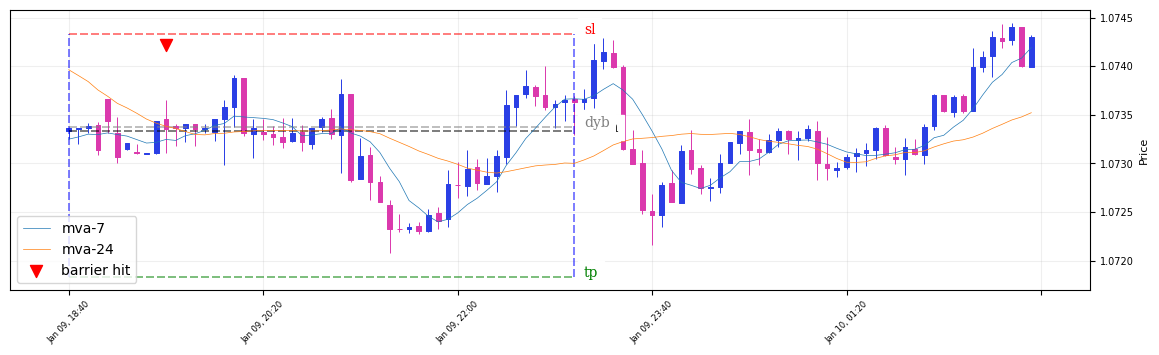

Open time  2023-01-09 18:40:00
Open price  1.07333
Stop loss 1.07433 (10) pips
Take profit 1.07183 (15) pips


In [19]:
# prepare data

open_period = "2023-01-09 18:40:00"
time_barrier = "2023-01-09 23:00:00"
open_price = df.open[open_period]
trade_side = TradeSide.SELL
stop_loss_width = 10
take_profit_width = 15
stop_loss = round(open_price - trade_side.value * stop_loss_width*PIP_FACTOR, PIP_POSITION + 1)
take_profit = round(open_price + trade_side.value * take_profit_width*PIP_FACTOR, PIP_POSITION + 1)

# calculate event attributes
mask = (df[open_period:]["close"].shift(1) > df[open_period:]["mva-24"].shift(1) ) & ( df[open_period:]["close"] < df[open_period:]["mva-24"] )
hit_level = df[open_period:][mask]["mva-24"].iloc[0].round(PIP_POSITION+1)
hit_datetime = df[open_period:][mask][open_period: ]["mva-24"].index[0]
barrier_hit = BarrierHit(level=hit_level, hit_datetime=hit_datetime, barrier_type=BarrierType.DYNAMIC)


# plot
plot_tb = PlotTripleBarrier(df.open, 
                           df.high,
                           df.low,
                           df.close,
                           4,
                           overlay_features=[ df["mva-7"], 
                                             df["mva-24"]])


plot_tb.plot(entry_period=open_period,
             stop_loss_level=stop_loss,
             take_profit_level=take_profit,
             time_barrier_datetime=time_barrier,
             dynamic_exit_price=hit_level,
             periods_to_plot=100,
             closing_event=barrier_hit
             )

print("Open time ", open_period)
print("Open price ", open_price)
print(f"Stop loss {stop_loss} ({stop_loss_width}) pips")
print(f"Take profit {take_profit} ({take_profit_width}) pips")

### Plot full triple barrier case: Dynamic barrier hit, beyond TP and SL, Short Trade

Plotting barrier for 100


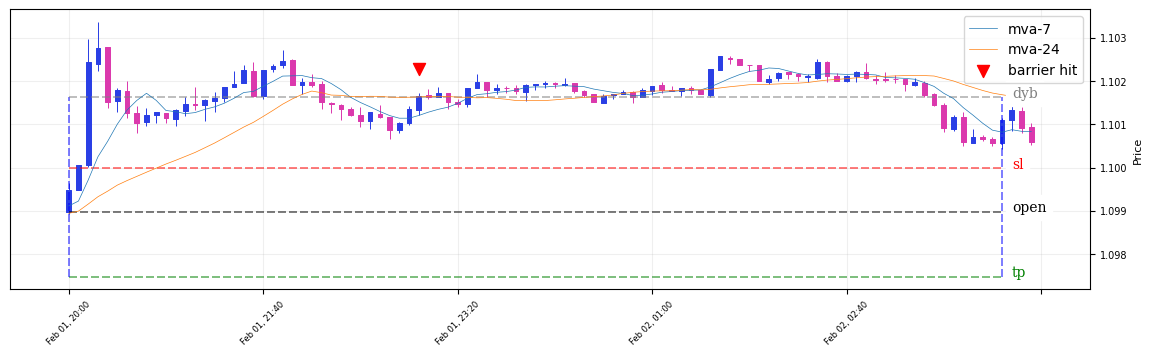

Open time  2023-02-01 20:00:00
Open price  1.09898
Stop loss 1.09998 (10) pips
Take profit 1.09748 (15) pips
Time barrier 2023-02-02 04:00:00


In [44]:
# prepare data

open_period = "2023-02-01 20:00:00"
time_barrier = "2023-02-02 04:00:00"
open_price = df.open[open_period]
trade_side = TradeSide.SELL
stop_loss_width = 10
take_profit_width = 15
stop_loss = round(open_price - trade_side.value * stop_loss_width*PIP_FACTOR, PIP_POSITION + 1)
take_profit = round(open_price + trade_side.value * take_profit_width*PIP_FACTOR, PIP_POSITION + 1)

# calculate event attributes
mask = (df[open_period:]["close"].shift(1) < df[open_period:]["mva-24"].shift(1) ) & ( df[open_period:]["close"] > df[open_period:]["mva-24"] )
hit_level = df[open_period:][mask]["mva-24"].iloc[0].round(PIP_POSITION+1)
hit_datetime = df[open_period:][mask][open_period: ]["mva-24"].index[0]
barrier_hit = BarrierHit(level=hit_level, hit_datetime=hit_datetime, barrier_type=BarrierType.DYNAMIC)


# plot
plot_tb = PlotTripleBarrier(df.open, 
                           df.high,
                           df.low,
                           df.close,
                           4,
                           overlay_features=[ df["mva-7"], 
                                             df["mva-24"]])


plot_tb.plot(entry_period=open_period,
             stop_loss_level=stop_loss,
             take_profit_level=take_profit,
             time_barrier_datetime=time_barrier,
             dynamic_exit_price=hit_level,
             periods_to_plot=100,
             closing_event=barrier_hit
             )

print("Open time ", open_period)
print("Open price ", open_price)
print(f"Stop loss {stop_loss} ({stop_loss_width}) pips")
print(f"Take profit {take_profit} ({take_profit_width}) pips")
print(f"Time barrier {time_barrier}")

In [32]:
df.iloc[-2:]

,open,high,low,close,volume,mva-7,mva-24
date-time,,,,,,,
2024-02-02 17:45:00,1.07932,1.07940,1.07930,1.07940,422.21,1.079409,1.079224
2024-02-02 17:50:00,1.07938,1.07953,1.07938,1.07951,687.42,1.079404,1.079252
